In [0]:
#-*- coding: utf-8 -*-

<img align="right" style="max-width: 200px; height: auto" src="https://imgur.com/ehpuUZW.png">

#  Exercise 11 - "Machine Learning III: <br /> Artificial Neural Networks"

Fundamentals and Methods of Computer Science, University of St. Gallen, Autumn Term 2019

## Introduction
In this assignment we have the grand finale of our short part on Machine Learning. In the last week, you have build your own Gaussian Naive Bayes and k-Nearest-Neighbors classifiers. In this week, we will also build classifiers, only way more powerful. Will train **Neural Networks** to classify images.

<!-- <img align="center" style="max-width: 800px; height: auto" src="https://i.imgur.com/iv6NSf0.png"> -->
<!-- <img align="center" style="max-width: 800px; height: auto" src="https://i.imgur.com/iv6NSf0.png"> -->
<img align="center" style="max-width: 800px; height: auto" src="https://i.imgur.com/gKsZsJL.png">

Before we start, we'll bring ourselves to the right level of "stoke" with another great video.

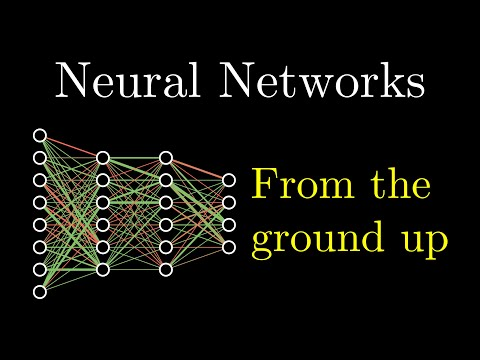

In [0]:
from IPython.display import YouTubeVideo
# Google AI: "Detecting cancer in real-time with machine learning"
YouTubeVideo('aircAruvnKk', width=1024, height=576)

## What are we going to do this exercise?
In this third machine learning exercise we will learn how to implement, train and apply our first **Neural Network** using a Python library named **"PyTorch"**. PyTorch is an open-source machine learning library for Python, used for a variety of applications such as image classification and natural language processing. Don't be afraid, we will show you first a full example how to use it in the first half of this notebook.

We will use the implemented neural network to classify images of handwrittend digits (i.e., data without defined categories or groups).

<img align="center" style="max-width: 700px" src="https://i.imgur.com/3qanTVL.png">

## Exercise structure
Following our example the workflow of the neural network training exercise is structured in to the following tasks:

**Task 1:** Neural Network Training - 8 points
> 1.1  implement the load_data method.<br>
> 1.2  complete the __init__ and forward methods of the Model class.<br>
> 1.3  complete the train and test part of the train_and_test method.<br>
> 1.4  implement the plot_loss_accuracy method<br>

**Task 2:** Neural Networks - Understanding - 2 points
> 2.1  read and understand the content we provide throughout the notebook.<br>
> 2.2  answer the multiple choice questions in the jupyter notebook.<br>

## Setup of the Assignment Environment
You can run this notebook either on your computer or on the Google Colab. We recommend you to use Google Colab for faster computation and its ease of use. In case you've decided to go with your own machine, make sure to first install PyTorch thorugh the through the instructions <a href="https://pytorch.org/">here</a>. By choosing your operating system and python version, it will show you the command that you need to run to install PyTorch. For the CUDA option, please choose None if you are not sure that your computer has a GPU that supports CUDA. All Macbook users must choose None for the CUDA option. 

<img align="center" style="max-width: 500px" src="https://i.imgur.com/YYk31aN.png">


Similar to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization as well as **pytorch** library that handels the **Neural Network** part. In this assignment will use, [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/) [Pillow](https://python-pillow.org/) and finally [pytorch](https://pytorch.org/) libraries. Let's import the libraries by the execution of the statements below:


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import IPython.display

# set grading variable to False to test your code it will be set to True during grading
if __name__ == '__main__':
    grading = False
else:
    grading = True

## Part 1: Classifying Images with Pytorch - Example
In this section, we'll go through the concepts of defining and training neural networks. We'll guide you through the process and explain the steps as we go. We start off with the **data loading** and continue with the neural network **model defintion**. Eventually, we get to the **training** of the neural network, which includes the definition of the **loss** and choice of **optimizer**. To know more details, we highly recommend visiting this Friday's lecture: it'll offer explanation on all these topics. At the end of the lecture, there will be a coding lab to give you hands on examples on defining and training neural networks.

### Data loading

Before starting with neural networks, let's see how we can download and prepare a dataset called MNIST consisting of 60,000 training samples and 10,000 test samples of handwritten digits (as seen below). Fortunately, PyTorch comes with a rich set of datasets and dataloaders, so we can use it right away in this notebook.<br>

<img align="center" style="max-width: 500px" src="https://i.imgur.com/SWIfv8b.png">

<br>



#### Downloading and exploring MNIST
To download a datasets, we use the *dataset* class from *torchvision* by simply calling ```torchvision.datasets.MNIST()```. Inside MNIST function there are different parameters which are explained below:<br>
<br>
**root**: path to dataset files.<br>
**train**: whether to load train data or test.<br>
**download**: setting this option to true makes it download the dataset files automatically.<br>
**transforms**: preprocessing method of the data for PyTorch.<br>
<br>

In the code below, we load data for training and testing using torchvision's datasets class.

In [0]:
mnist_train_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = True,
    download = True,
    transform = transforms.ToTensor())

mnist_test_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = False,
    download = True,
    transform = transforms.ToTensor())

mnist_train_loader = DataLoader(mnist_train_set, batch_size=64, shuffle=True)
mnist_test_loader = DataLoader(mnist_test_set, batch_size=64)

That easy! We already have train and test sets separated. There is only one part left to understand before moving to the next step, which is the transforms. Transforms are handy functions that one can use to pre-process the data before feeding it to the model.<br>
In the example above, we use a standard procedure to prepare the data for PyTorch by converting the images to PyTorch tensors.

After downloading the dataset, let's visualize the first two images in the dataset. Can you tell, which numbers these are?

Image label: 5
Image label: 0


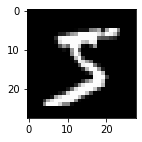

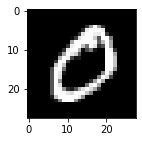

In [0]:
def show(item):
    """Plots an item from dataset and print its label.
       Input format: (Image, Label)
    """
    fig = plt.figure(figsize=(2, 2))
    label = item[1] 
    print(f"Image label: {label}")
    image = np.array(item[0])
    image = np.transpose(image, (1, 2, 0))
    image = np.repeat(image, 3, 2)
    plt.imshow(image, cmap='gray',interpolation='none')
    
trainset_iter = iter(mnist_train_set)
item_0 = next(trainset_iter)
item_1 = next(trainset_iter)
show(item_0)
show(item_1)


#### Data batch
After loading train and test sets, we need to wrap them with DataLoaders. Since in the training of neural networks we need to train the model iteratively with small chunks of data,  we'll need to split the trainset into batches and go through each batch sequentially as it is not possible to fit the whole dataset into the memory. DataLoaders do that for us. When defining a dataloader, we need to choose the value of batch_size and set shuffle option to either True or False. By setting shuffle=True, the dataloader will first shuffle the data and then split it into batches. 
<br>
<br>

<img align="center" style="max-width: 500px" src="https://i.imgur.com/DN90pQY.png">


### Model definition

After loading and visualizing data, we need to define the model. A neural network model is composed of multiple layers allowing the data to be processed in a feedforward way. Defining the data processing between layers is complex, but PyTorch thankfully does it for us. Model definition in PyTorch has two components, the constructor and the forward function. Inside the constructor, we define the parts of the model. In the forward function, we implement the forward pass through the network. 
Below you can see the standard code snippet for PyTorch model:<br>
```python
class Model(nn.Module):
    def __init__(self):
       """Model layers are defined here."""

    def forward(self, x):
       """Execution steps are implemented here."""
```
In the following, we provide you with three different descriptions of the **same** neural network: figure, table and code all represent the **same** architecture. Try and find the connections between code and table. Given the table of layers/operations below, we want to create the model and its forward function.

<br>
<img align="center" style="max-width: 800px" src="https://i.imgur.com/2CJailf.png">

<br>
<img align="center" style="max-width: 600px" src="https://i.imgur.com/jvvi8bK.png">

<br><br>

Short description of each layer/operation:
<br>
**nn.Conv2D**: Convolves input with kernels of size kernel_size x kernel_size. It is used for feature extraction and finding repeating patterns in an image.<br> 
**nn.Dropout / nn.Dropout2d**: Randomly turns off neurns in a layer with probability p. It's good for generalization.<br>
**nn.MaxPool2d**: Decreases the input size by first splitting input into tiles of size kernel_size x kernel_size and then taking the maximum of each time.<br>
**nn.flatten**: Takes a 2D input (for example an Image) to a vector by flattening the input.<br>
**nn.Linear**: Applies linear transformation to a vector and converts it into a new vector.<br>
**nn.Softmax**: Turns a vector into a probability vector such that the sum of its elements will be equal to 1.0.<br>
**nn.ReLU**: An activation function that is used after layers like Conv2D and Linear.





In [0]:
class MNIST_Model(nn.Module):
    def __init__(self):
        super(MNIST_Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.dropout1 = nn.Dropout2d(p=0.25)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(in_features=9216, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out1 = self.conv1(x)
        out2 = self.relu(out1)
        out3 = self.conv2(out2)
        out4 = self.max_pool2d(out3)
        out5 = self.dropout1(out4)
        out6 = torch.flatten(out5, 1)
        out7 = self.fc1(out6)
        out8 = self.relu(out7)
        out9 = self.dropout2(out8)
        out10 = self.fc2(out9)
        y_hat = self.softmax(out10)
        return y_hat

Inside ```__init__()``` we first call ```super(Model, self).__init__()``` since it inherits from nn.Module. All layers are then defined according to the paremeters given in the model table.<br>
In function ```forward(x)```, x is the input to the neural network. The input should be passed from one layer to another correctly until it gets to the end of the network. **The order of operations in the forward function must be exactly the same as the order of layers defined in the model table**.<br>

### Neural Network Training
Now that we have the data and model ready, we're almost ready to train the model with the trainset and evaluate it using the testset. We still need two more components before we can get to that: the **loss** and **optimizer**. The last lecture provides extensive information on neural network training, we'll stick to the basics here. 

The loss is similar to the performance measures you've already computed over the last weeks. For our purposes, the loss $\mathcal{L}$ is a function of the difference between the network prediction $\mathbf{\hat{y}}$ and the ground truth $\mathbf{y}$, eg. : $\mathcal{L} = MSE(\mathbf{\hat{y}}, \mathbf{y})$. Depending on the use-case, different loss functions exist. In the lecture, you learned about the least-square error. For this example, we use the `CrossEntropyLoss` function (multi-class classification).

<br>
<img align="center" style="max-width: 700px" src="https://i.imgur.com/Ka5Qdtx.png">

Now that we have a loss function which expresses the error between prediction $\mathbf{\hat{y}}$ and ground truth $\mathbf{y}$, we want to minimize the loss; more precisely, we look for those network parameters, which minimize the loss. Again PyTorch is helping us, we can pick a predefined optimizer. In the lecture, we saw Stochastic Gradient Descent (SGD), in this case we pick the `Adadelta` optimizer.

For our example, we provide the entire code to train the model, **you don't need to change anything here**. The training workflow is as follows.
**Training workflow in each epoch:**
> 1. model.train() - *set model to training mode.*  
    > 2. loop over batches  - *get all data in small bites*  
        >> 3. optimizer.zero_grad() - *zero the gradients for a fresh start of the optimizer*  
        >> 4. output = mode(data) - *compute model prediction*  
        >> 5. loss = criterion(output,target) - *compute loss*  
        >> 6. loss.backward() - *compute contribution of each parameter to the loss with backpropagation method*  
        >> 7. optimizer.step() - *update all network parameters*


In [0]:
def train_and_evaluate():
    num_epochs = 5 
    print_every = 100 
    
    # if GPU is available, we do the computation on the GPU: it's much faster. Otherwise, we fall back to the CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

    model = MNIST_Model()
    model.to(device)
    
    # define optimizer
    optimizer = optim.Adadelta(model.parameters(), lr=0.01)
    
    # define criterion
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(0, num_epochs):
        # ---------------------------- train the model with trainset
        model.train()

        for batch_idx, (data, target) in enumerate(mnist_train_loader):
            data, target = data.to(device), target.to(device) # transfer data and target to the selected device
            optimizer.zero_grad() # zeros the gradients of network parameters
            output = model(data) # get output of the neural network (forward pass)
            loss = criterion(output, target) # compute the loss between output and target
            loss.backward() # apply backpropagation (backward pass)
            optimizer.step() # apply changes (with respect to the gradients) to the network parameters
            
           
            if batch_idx % print_every == 0:
                loss_iter = 100. * batch_idx / len(mnist_train_loader)
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(mnist_train_loader.dataset), loss_iter, loss.item()))

        # ---------------------------- evaluate/test model with testset
        model.eval()
        test_loss = 0
        correct = 0
        for data, target in mnist_test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            _, pred = torch.max(output.data, 1)  # get the index of the max probability
            correct += (pred == target).sum().item()

        test_loss /= len(mnist_test_loader.dataset)
        num_items = len(mnist_test_loader.dataset)
        
        
        correct_perc = 100. * correct / len(mnist_test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, num_items, correct_perc))
    
    torch.save(model.state_dict(), "mnist_checkpoint.pt") # saves the model weights

Alright, let's see if we can train using your function. It may take a moment, be patient!

In [0]:
# do not change this cell
if not grading:
    train_and_evaluate()

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.304060
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.301214
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.298275
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.297969
Train Epoch: 0 [25600/60000 (43%)]	Loss: 2.296192
Train Epoch: 0 [32000/60000 (53%)]	Loss: 2.293954
Train Epoch: 0 [38400/60000 (64%)]	Loss: 2.290812
Train Epoch: 0 [44800/60000 (75%)]	Loss: 2.273617
Train Epoch: 0 [51200/60000 (85%)]	Loss: 2.279800
Train Epoch: 0 [57600/60000 (96%)]	Loss: 2.232220

Test set: Average loss: 0.0349, Accuracy: 3224/10000 (32%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.209417
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.153504
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.122774
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.008501
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.887140
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.870211
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.855570
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.896801
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.798404
T

## Part 2: Classifying Images with Pytorch - Exercise
In this section, you'll implement the four parts of neural network training yourself: **data loading**, **model defintion**, **training** and **performance evaluation**. If the concepts or implementation are still unclear, be advised to take another look at our example above! Although we ask you to change some parameters and wrap code in functions, the workflow remains the same. 

### Task 1.1: Data loader
We start off with the **datasets** and **dataloaders**. The [**FashionMNIST**](https://github.com/zalandoresearch/fashion-mnist) dataset is a simple example from the online fashion retailer **Zalando**. It contains 28x28 pixel grayscale images of clothes belonging to 10 classes. The training dataset contains 60,000 samples, the testset 10,000 samples. 
Complete the function in the cell below!


In [0]:
# Task 1.1
def load_data(batch_size):
    """
    This function uses torchvision.datasets and DataLoader to define the datasets and 
    make the accessible to pytorch in the DataLoader format. 
    
    :param batch_size: integer with size of training and test batches
    
    :return: train_loader - pytorch DataLoader object containing the training samples with batches of *batch_size*
    :return: test_loader - pytorch DataLoader object containing the test samples with batches of *batch_size*

    first, define (and download) the train_set and test_set using torchvision.datasets as above
    
    second, create DataLoader objects from the train_set and test_set. Use the batch_size passed to the function. 
    Also, set shuffle=true for the train_loader and shuffle=False for the test_loader 

    """
    torch.manual_seed(12345)
  
    ### your code here ###
    
    train_set = torchvision.datasets.FashionMNIST(
      root = './data/FashionMNIST',
      train = True,
      download = True,
      transform = transforms.ToTensor())


    test_set = torchvision.datasets.FashionMNIST(
      root = './data/FashionMNIST',
      train = False,
      download = True,
      transform = transforms.ToTensor())
    

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

    
    
    return train_loader, test_loader

Ok, let's use your function to create the dataloaders. If you don't get any errors, it probably worked ;)

In [0]:
# Do not change this cell
if not grading:
    batch_size = 64
    train_loader, test_loader = load_data(batch_size) 

### Task 1.2: Model definition
The next step is to define the model. Implement the constructor and forward function according to the table below. The table contains all information necessary. If you're not sure about what you need to do here, scroll up and take another good look at the example.

<img align="center" style="max-width: 700px" src="https://i.imgur.com/zPGnX9O.png">
<br>

Complete the class definition below!

In [0]:
class Model(nn.Module):
    """
    this class contains the neural network architecture we want to use. 
    
    NOTE! Strictly stick to the names we provide in the table. Different names may not be reckognized by the autograder!
    
    """
    def __init__(self):
        super().__init__()

        """
        TASK 1.2.1
        Model constructor:
        
        :param self: neural network model object
        
        :return: None
        
        Define the components indicated in the table.

        Orientation provided in the sample above.
        
        """
        
        ### your code here ###

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.relu = nn.ReLU()
        self.maxpool_2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.softmax = nn.Softmax(dim=1)
        self.out = nn.Linear(in_features=60, out_features=10)
        

        
        ### all done ###

    # define forward function
    def forward(self, x):
        
        """
        # TASK 1.2.2.
        
        This function determines the data flow through the network layers from input to output.

        :param self: neural network model object
        :param x: input data (batch)
        
        :return x: output data
    
        Define the forward pass of data through the network. Begin with the first layer 
        and continue to work your way through layer by layer. 

        Orientation provided in the sample above.
        
        """
        ### your code here
        

        out1 = self.conv1(x)
        out2 = self.relu(out1)
        out3 = self.maxpool_2d(out2)
        out4 = self.conv2(out3)
        out5 = self.relu(out4)
        out6 = self.max_pool2d(out5)
        out7 = torch.reshape(out6, (-1,12*4*4))
        out8 = self.fc1(out7)
        out9 = self.relu(out8)
        out10 = self.fc2(out9)
        out11 = self.relu(out10)
        out12 = self.out(out11)
        x = self.softmax(out12)

        
        ### all done ###

        return x


Great! Let's see if we can create a test_model with your model definition. If there are no errors here, you've passed the first hurdle:

In [0]:
# do not change this cell
if not grading:
    model = Model()
    # let's print what the model is like
    print(model)

Model(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (relu): ReLU()
  (maxpool_2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (softmax): Softmax(dim=1)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


### Task 1.3: Train and test function
Now we can define the loop that trains and evaluates the network. Fill in the skelleton code below!

In [0]:
def train_and_test(num_epochs):
    """
    This function loops over the epochs. It trains on the trainset and evaluates on the testset
    At each epoch it loops over all batches. For each batch, it computes the loss and updates the paramters.
    
    For orientation, refer to the example above.
    
    """
    # let's instaciate the network:
    model = Model();
    
    """
    TASK 1.3.1: define loss criterion and optimizer
    define "criterion" as the CrossEntropyLoss, as above
    define "optimizer" as the Adam optimizer with lr=0.001.
    """
    ### your code here ###
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    criterion = nn.CrossEntropyLoss()

    ### all done ###
    
    # let's initialize the output lists and training hyperparamters (epochs, batchsize)
    train_losses = [];
    test_accuracies = []
    batch_size = 32
    
    for epoch in range(num_epochs):
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.float()
            labels = labels
            
            """
            TASK 1.3.2: training 
            implement the following steps
                1. zero_grad()
                2. compute the model output predictions
                3. compute the loss
                4. backpropagate the loss with .backward()
                5. take an optimizer step
            """
            ### your code here ###########################
            
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            ### all done #################################
            
            train_losses.append(loss.item());

            if (i+1) % 100 == 0:
                print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                       %(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

        
        model.eval()
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.float()
            
            """
            TASK 1.3.3: test accuracy
            compute the total and correct predictions on the test set.
            Perform the following steps:
            1) compute the model predictions on the test set.
            2) identify the class-label prediction with the max() function, as above
            3) count "total" and "correct" predictions
            """
            ### your code here ###########################
            output = model(images)
            _, pred = torch.max(output.data, 1)
            correct += (pred == labels).sum().item()
            
            
            ### all done #################################
        total = len(test_loader.dataset)
        
        accuracy = 100 * correct / total
        test_accuracies.append(accuracy)
        print(f'Test Accuracy of the model on the 10000 test images: {accuracy}%')
    
    torch.save(model.state_dict(), "model_checkpoint.pt")    
    return train_losses, test_accuracies

Great job, that's the hardest part out of the way. Now we can go ahead and train our neural network! Run the code in the cell below and see the magic happening.
Change the number of epochs until you get test accuracy higher that 80%. Keep the `model_checkpoint.pt` with a test accuracy higher than 80% and include it in your `assignment11.zip`

In [0]:
# do not change this cell
if not grading:
    train_losses, test_accuracies = train_and_test(num_epochs = 5)

Epoch : 1/5, Iter : 100/938,  Loss: 1.8274
Epoch : 1/5, Iter : 200/938,  Loss: 1.7931
Epoch : 1/5, Iter : 300/938,  Loss: 1.7608
Epoch : 1/5, Iter : 400/938,  Loss: 1.6091
Epoch : 1/5, Iter : 500/938,  Loss: 1.7985
Epoch : 1/5, Iter : 600/938,  Loss: 1.6894
Epoch : 1/5, Iter : 700/938,  Loss: 1.7347
Epoch : 1/5, Iter : 800/938,  Loss: 1.6698
Epoch : 1/5, Iter : 900/938,  Loss: 1.6292
Test Accuracy of the model on the 10000 test images: 76.26%
Epoch : 2/5, Iter : 100/938,  Loss: 1.6301
Epoch : 2/5, Iter : 200/938,  Loss: 1.7965
Epoch : 2/5, Iter : 300/938,  Loss: 1.7377
Epoch : 2/5, Iter : 400/938,  Loss: 1.6819
Epoch : 2/5, Iter : 500/938,  Loss: 1.6771
Epoch : 2/5, Iter : 600/938,  Loss: 1.6730
Epoch : 2/5, Iter : 700/938,  Loss: 1.6698
Epoch : 2/5, Iter : 800/938,  Loss: 1.6239
Epoch : 2/5, Iter : 900/938,  Loss: 1.6381
Test Accuracy of the model on the 10000 test images: 79.49%
Epoch : 3/5, Iter : 100/938,  Loss: 1.6484
Epoch : 3/5, Iter : 200/938,  Loss: 1.6399
Epoch : 3/5, Iter : 

### Task 1.4: Plot loss and accuracy graphs
Lastly, let's plot the training loss and accuracy over training epochs. This way, we can keep track of the training and see if it was successful.

In [0]:
# Task 1.4
def plot_performance(perf_list, name):
    """
    This function plots the losses and accuarcies we've recorded during the training.
    
    :param perf_list: list with performance values for each epoch.
    :param name: output image name.
    
    Use your plotting skills which you've aquired in the previous weeks. 
    Plot the losses and accuracies over epochs in one plot. 
    """

    ### your code here ###
    plt.plot(perf_list)

    if name == "accuracy":
      plt.xticks([x for x in range(0,len(perf_list))],[x + 1 for x in range(0,len(perf_list))])
      plt.xlabel("Epoch")
      plt.ylabel("Accuracy")
      plt.title("Accuracy in each Epoch")
    elif name == "loss":
      plt.xticks([x for x in range(0,len(perf_list)) if x % 1000 == 0],[x for x in range(0,len(perf_list)) if x % 1000 == 0])
      plt.xlabel("Iteration")
      plt.ylabel("Loss")
      plt.title("Losses per Iteration")
    
    ### all done ###
    
    plt.savefig(f"./{name}.png")    
    plt.show();


Finally, let's visualize your results! Can you see a difference between training and test performance?

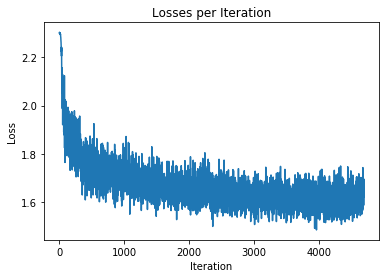

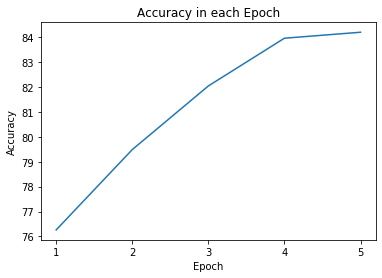

In [0]:
# do not change this cell
if not grading:
  plot_performance(train_losses, "loss")
  plot_performance(test_accuracies, "accuracy")

### Task 2: Neural Networks - Understanding (multiple choice)

**Question 1**: In pytorch, dataloaders are common to handle dataset preparation. What do we use them for? (1 correct answer)
> 1. dataloaders are a convenient way to download datasets. => answer_1 = 1
> 2. in dataloaders, we can download and transform data to improve generalization. => answer_1 = 2
> 3. we shouldn't use dataloaders, because someone else has written it. we should only use our own code. => answer_1 = 3
> 4. dataloaders are a convenient wrapper to provide the data in (shuffled) batches to the training loop. => answer_1 = 4

In [0]:
## set your answer_1 in this cell
# set answer as one of [1,2,3,4]


answer_1 = 4

**Question 2**: For the training of neural networks, we use something called *loss*. Which of the statements is correct?  (1 correct answer)
> 1. The loss is a variation of the error between prediction $\mathbf{\hat{y}}$ and ground truth $\mathbf{y}$. We try to minimize it to get better predictions. => answer_2 = 1
> 2. The loss is another performance metric, just like precision and recall. It's not necessary, but it offers additional information on specific datasets. => answer_2 = 2
> 3. The loss of a neural network is a synonym for lost computation time. The term is still in use for historic reasons. => answer_2 = 3
> 4. The loss is a list of samples, where network predicted the wrong class labels during training. They were *lost* in the learning phase, thus the name. => answer_2 = 4

In [0]:
## set your answer_2 in this cell
# set answer as one of [1,2,3,4]
answer_2 = 1

**Question 3**: We have now successfully trained two neural networks. But what does training actually mean?  (1 correct answer)
> 1. In the training of a neural network, we identify the nearest neighbors for the entire input space. Therefore, when we use the net, we can identify the neighbors immediately, which makes them more efficient => answer_3 = 1
> 2. During the training, we iterate over the entire dataset only once because it otherwise overfits. => answer_3 = 2
> 3. In the training phase, we change the signal flow through the network: it always is the logarithmic cosine Kulbach-Leibler distance of the ideal solution. => answer_3 = 3
> 4. During training, we update the network's parameters so that the loss is minimzed. => answer_3 = 4

In [0]:
## set your answer_3 in this cell
# set answer as one of [1,2,3,4]
answer_3 = 4

**Question 4**: Depending on the data type, we use different neural network architectures. What can you say about convolution layers? (1 correct answer)
> 1. Convolutional layers are quite simple and therefore still in use for sample problems, but are actually not ideal on spatial data like images. => answer_4 = 1
> 2. Convolutional layers are particularly good at recognizing patterns in spatial data, which is why we use them on images. => answer_4 = 2
> 3. Convolutional layers are way too complex for the regular neural network user, therefore we shouldn't use them. => answer_4 = 3
> 4. *Convolution* actually is an arbitrary name Y.LeCun introduced to the broader public but J.Schmidhuber invented in the 1990s. => answer_4 = 4

In [0]:
## set your answer_4 in this cell
# set answer as one of [1,2,3,4]
answer_4 = 2